In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime

# Seasonal-Trend Decomposition using LOESS (STL)

## Read the Data

In [25]:
?pd.infer_freq

Signature:
pd.infer_freq(
    index: 'DatetimeIndex | TimedeltaIndex | Series | DatetimeLikeArrayMixin',
) -> 'str | None'
Docstring:
Infer the most likely frequency given the input index.

Parameters
----------
index : DatetimeIndex, TimedeltaIndex, Series or array-like
  If passed a Series will use the values of the series (NOT THE INDEX).

Returns
-------
str or None
    None if no discernible frequency.

Raises
------
TypeError
    If the index is not datetime-like.
ValueError
    If there are fewer than three values.

Examples
--------
>>> idx = pd.date_range(start='2020/12/01', end='2020/12/30', periods=30)
>>> pd.infer_freq(idx)
'D'
File:      ~/.local/lib/python3.10/site-packages/pandas/tseries/frequencies.py
Type:      function

In [23]:
ice_cream_interest = pd.read_csv('ice_cream_interest.csv')
ice_cream_interest.set_index('month', inplace=True)
# pd.infer_freq(ice_cream_interest.index)
# ice_cream_interest = 
# ice_cream_interest.asfreq(freq=pd.infer_freq(ice_cream_interest.index))
ice_cream_interest

,interest
month,
2004-01,13
2004-02,15
2004-03,17
2004-04,19
2004-05,22
...,...
2020-04,55
2020-05,71
2020-06,81


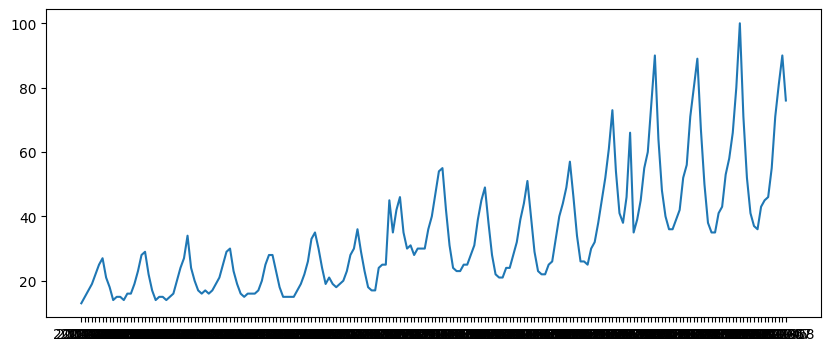

In [20]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)

ConversionError: Failed to convert value(s) to axis units: datetime.datetime(2004, 1, 1, 0, 0)

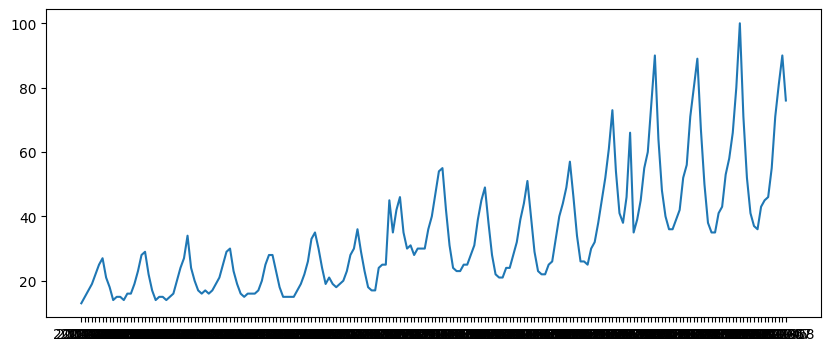

In [21]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

## Visual Inspection: Mid-2011 and Late-2016

## Perform STL Decomp

In [78]:
stl = STL(ice_cream_interest)
result = stl.fit()

In [79]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

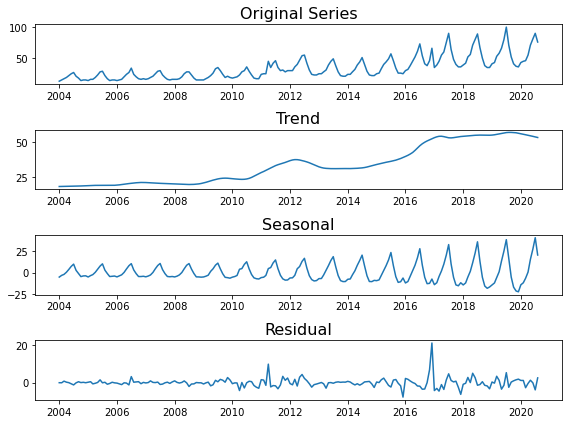

In [80]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(ice_cream_interest)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

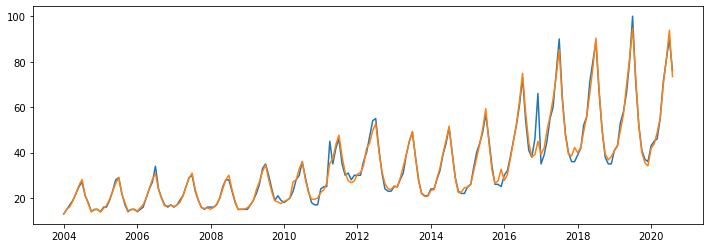

In [85]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(ice_cream_interest)
plt.plot(estimated)

## Anomaly Detection

In [114]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(731459.0, 737760.0)

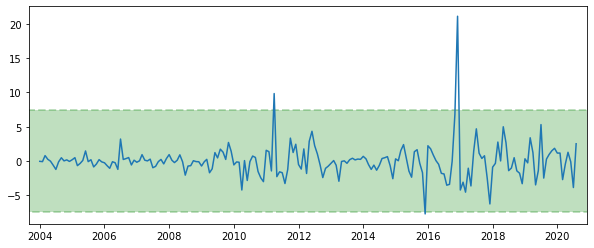

In [115]:
plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))

In [122]:
anomalies = ice_cream_interest[(resid < lower) | (resid > upper)]

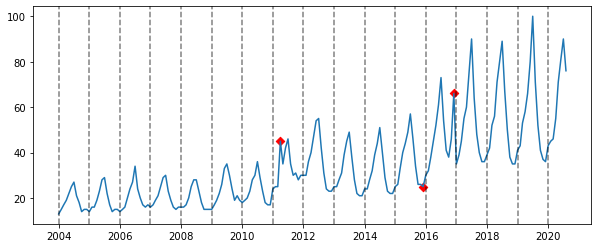

In [137]:
plt.figure(figsize=(10,4))
plt.plot(ice_cream_interest)
for year in range(2004,2021):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')

In [130]:
anomalies

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66
